In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import math
from scipy.stats import norm, binom, geom
from scipy.stats import t,f
from scipy.stats import ttest_1samp, ttest_rel, ttest_ind
from scipy.stats import chisquare
from scipy.stats import chi2_contingency
from scipy.stats import ttest_ind, f_oneway, kruskal
from scipy.stats import pearsonr, spearmanr
from scipy.stats import poisson, expon
from scipy.stats import levene, shapiro, ks_2samp, kstest
from statsmodels.graphics.gofplots import qqplot
import warnings
warnings.filterwarnings('ignore')

### A.Project Description
#### About Yulu
Yulu is India’s leading micro-mobility service provider, which offers unique vehicles for the daily commute. Starting off as a mission to eliminate traffic congestion in India, Yulu provides the safest commute solution through a user-friendly mobile app to enable shared, solo and sustainable commuting.
Yulu zones are located at all the appropriate locations (including metro stations, bus stands, office spaces, residential areas, corporate offices, etc) to make those first and last miles smooth, affordable, and convenient!

Yulu has recently suffered considerable dips in its revenues. They have contracted a consulting company to understand the factors on which the demand for these shared electric cycles depends. Specifically, they want to understand the factors affecting the demand for these shared electric cycles in the Indian market.

#### The company wants to know:

1. Which variables are significant in predicting the demand for shared electric cycles in the Indian market?

2. How well those variables describe the electric cycle demands

In [2]:
df1=pd.read_csv('bike_sharing.txt')
df=df1.copy()

#### B. Data Exploration

#### 1. Shape of data

In [3]:
df.shape

(10886, 12)

-> There are 10886 rows and 12 columns

#### 2. First-5 Rows

In [4]:
df.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


#### 3. Name of Columns

In [5]:
df.columns

Index(['datetime', 'season', 'holiday', 'workingday', 'weather', 'temp',
       'atemp', 'humidity', 'windspeed', 'casual', 'registered', 'count'],
      dtype='object')

###### Columns Descriptions
1. datetime: datetime
2. season: season (1:Spring, 2:Summer, 3:Rainy, 4:Winter )
3. holiday: whether day is a holiday or not.
4. workingday: if day is neither weekened nor holiday is 1, otheriwse ias 0.
5. weather: Four types of weather: {1: clear weather, 2: cloudy, 3: Light rain}
6. temp: temperature in celsius
7. atemp: feeling temperature in celsius
8. humidity: humidity
9. windspeed: wind speed
10. casual: count of casual users
11. registered: count of registered users.
12. count: count of total rental bikes including both casual and registered.

#### 4. Check if any Null/Missing Values in dataset ?

In [6]:
np.any(df.isna())

False

#### 5. Check if any duplicate rows present in dataset ?

In [7]:
np.any(df.duplicated())

False

#### 6: Dataset- Time Range

In [8]:
df['datetime'].min()

'2011-01-01 00:00:00'

In [9]:
df['datetime'].max()

'2012-12-19 23:00:00'

In [10]:
df['datetime']=pd.to_datetime(df['datetime'])
df['datetime'].max()-df['datetime'].min()

Timedelta('718 days 23:00:00')

#### 7. Dataset Information

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   datetime    10886 non-null  datetime64[ns]
 1   season      10886 non-null  int64         
 2   holiday     10886 non-null  int64         
 3   workingday  10886 non-null  int64         
 4   weather     10886 non-null  int64         
 5   temp        10886 non-null  float64       
 6   atemp       10886 non-null  float64       
 7   humidity    10886 non-null  int64         
 8   windspeed   10886 non-null  float64       
 9   casual      10886 non-null  int64         
 10  registered  10886 non-null  int64         
 11  count       10886 non-null  int64         
dtypes: datetime64[ns](1), float64(3), int64(8)
memory usage: 1020.7 KB


* Convert data type of datetime column from object to datetime

In [12]:
df['datetime']=pd.to_datetime(df['datetime'])

* Convert categorical attributes to categories

In [13]:
df.nunique()

datetime      10886
season            4
holiday           2
workingday        2
weather           4
temp             49
atemp            60
humidity         89
windspeed        28
casual          309
registered      731
count           822
dtype: int64

* We can transform the 'season','holiday','workingday','season' attributes into categorical variables due to their limited distinct values.

In [14]:
cat_cols=['season','holiday','workingday','weather']
for i in cat_cols:
    df[i]=df[i].astype('category')

* Converting 'casual','registered','count' columns from int64 to int16 to optimize memory usage.

In [15]:
int16_cols=['casual','registered','count']
for i in int16_cols:
    df[i]=df[i].astype('int16')

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   datetime    10886 non-null  datetime64[ns]
 1   season      10886 non-null  category      
 2   holiday     10886 non-null  category      
 3   workingday  10886 non-null  category      
 4   weather     10886 non-null  category      
 5   temp        10886 non-null  float64       
 6   atemp       10886 non-null  float64       
 7   humidity    10886 non-null  int64         
 8   windspeed   10886 non-null  float64       
 9   casual      10886 non-null  int16         
 10  registered  10886 non-null  int16         
 11  count       10886 non-null  int16         
dtypes: category(4), datetime64[ns](1), float64(3), int16(3), int64(1)
memory usage: 532.3 KB


#### 8. Statistical Properties

In [17]:
df.describe(include='number')

,temp,atemp,humidity,windspeed,casual,registered,count
count,10886.00000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000
mean,20.23086,23.655084,61.886460,12.799395,36.021955,155.552177,191.574132
std,7.79159,8.474601,19.245033,8.164537,49.960477,151.039033,181.144454
min,0.82000,0.760000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,13.94000,16.665000,47.000000,7.001500,4.000000,36.000000,42.000000
50%,20.50000,24.240000,62.000000,12.998000,17.000000,118.000000,145.000000
75%,26.24000,31.060000,77.000000,16.997900,49.000000,222.000000,284.000000
max,41.00000,45.455000,100.000000,56.996900,367.000000,886.000000,977.000000


In [18]:
df.describe(include='category')

,season,holiday,workingday,weather
count,10886,10886,10886,10886
unique,4,2,2,4
top,4,0,1,1
freq,2734,10575,7412,7192


#### 9. Add Season_category column

In [19]:
def season_category(x):
    if x==1:
        return 'spring'
    elif x==2:
        return 'summer'
    elif x==3:
        return 'rainy'
    else:
        return 'winter'

In [20]:
df['season_category']=df['season'].apply(season_category)
df[:2]

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,season_category
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16,spring
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40,spring


## B. Univariate Analysis

##### i. categorical columns: 'season_category', 'holiday','workingday','weather'

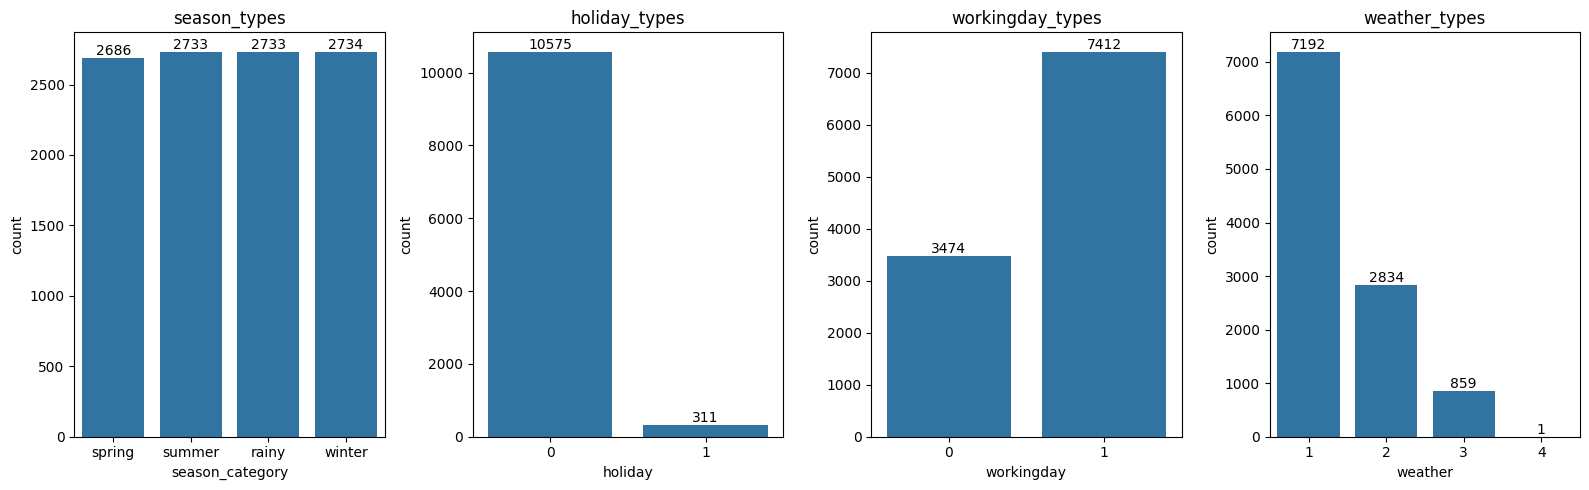

In [21]:
categories = ['season_category','holiday','workingday','weather']
titles = ['season_types','holiday_types','workingday_types','weather_types']

fig, axes = plt.subplots(1, 4, figsize=(16, 5))

for category, title, ax in zip(categories, titles, axes.flatten()):
    sns.countplot(data=df, x=category, ax=ax,legend=False)
    ax.bar_label(ax.containers[0])
    ax.set_title(title)
plt.tight_layout()
plt.show()

##### Insights:

1. Seasonal Demand:
    * The summer, rainy, and winter seasons exhibit similar levels of demand.
    * The spring season shows a slightly lower demand compared to the other seasons.

3. Holiday Impact:
    * Most days are non-holidays (10,575), with holidays being relatively infrequent (311).

4. Working Day Impact:
    * Bike rentals are more frequent on working days (7,412) compared to weekends (3,674).
    * This trend suggests that bikes are popular for daily commuting.

5. Weather Conditions:
    * The majority of bike rentals occur during clear weather (type 1), followed by cloudy weather (type 2), with fewer rentals during light rain (type 3).
    * This indicates that bike rental services are influenced by weather conditions.

##### ii. float value columns: 'temp','atemp','windspeed','humidity'

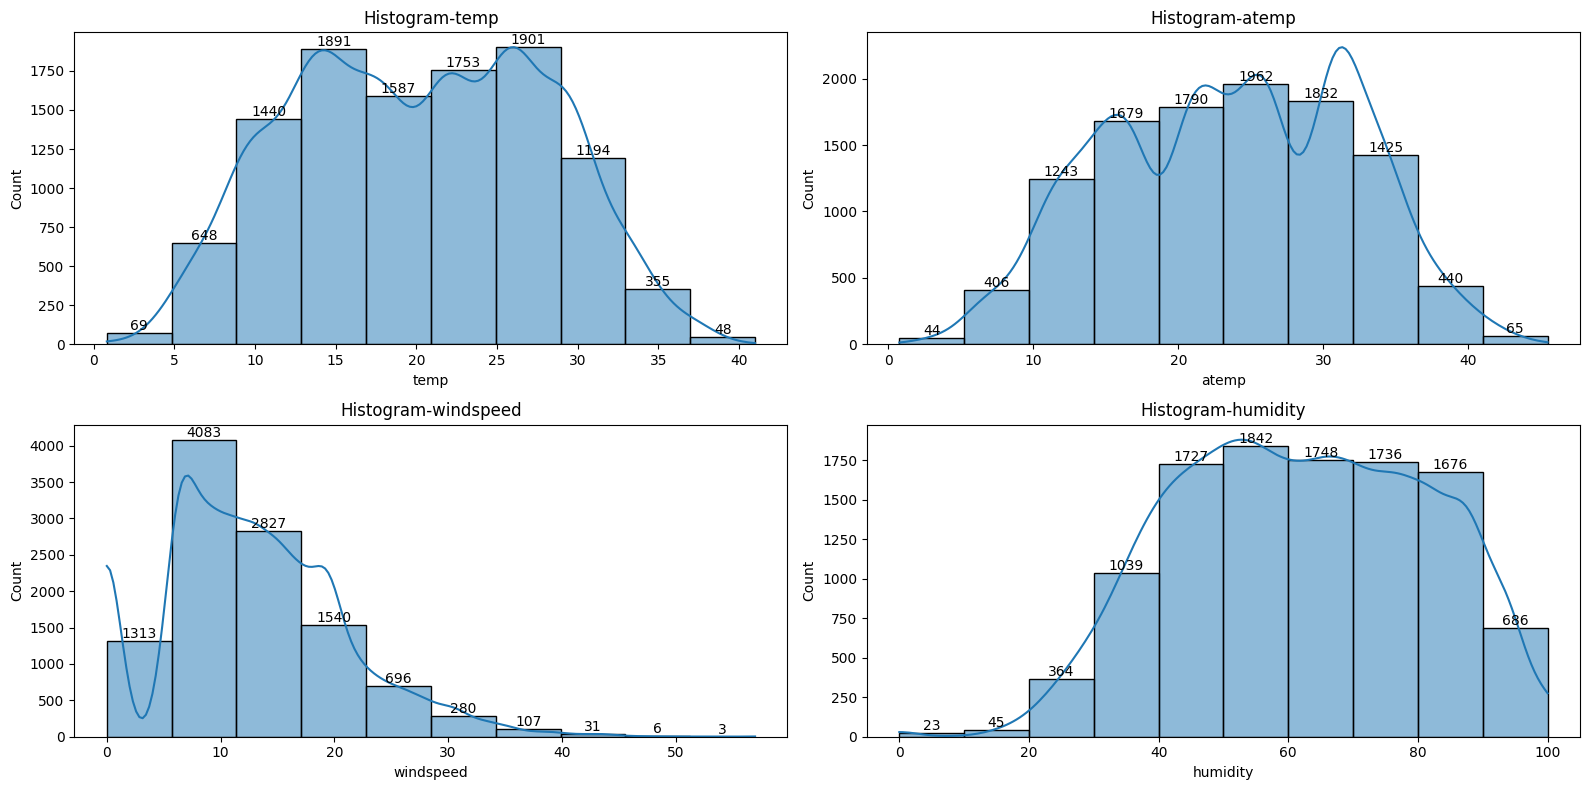

In [22]:
numericals=['temp','atemp','windspeed','humidity']
titles=['Histogram-temp','Histogram-atemp','Histogram-windspeed','Histogram-humidity']
fig, axes = plt.subplots(2, 2, figsize=(16, 8))
for numerical, title, ax in zip(numericals, titles, axes.flatten()):
    sns.histplot(data=df, x=numerical, ax=ax,bins=10,kde=True)
    ax.bar_label(ax.containers[0])
    ax.set_title(title)
plt.tight_layout()
plt.show()

##### Insights:
1. Temperature Influence:
    * Bike rentals peak when temperatures are between 13°C and 28°C.
    * Extremely low or high temperatures lead to a decrease in bike rentals.
2. Windspeed Influence:
    * Increasing windspeed correlates with a decrease in bike rental demand.
    * The highest demand for rental bikes occurs when windspeed ranges from 8 to 20 km/h.
3. Humidity Influence:
    * Higher humidity levels (e.g., 40% to 90%) are associated with an increase in bike rentals.


##### iii. columns ='casual','registered','count'

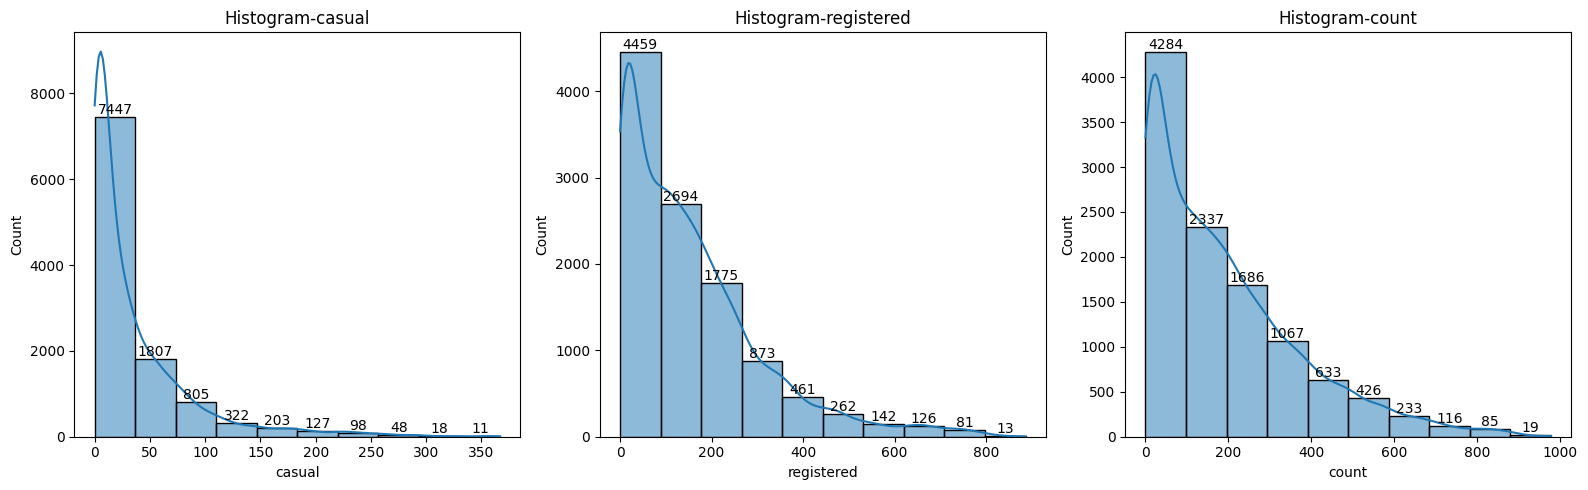

In [23]:
numericals=['casual','registered','count']
titles=['Histogram-casual','Histogram-registered','Histogram-count']
fig, axes = plt.subplots(1, 3, figsize=(16, 5))
for numerical, title, ax in zip(numericals, titles, axes.flatten()):
    sns.histplot(data=df, x=numerical, ax=ax,bins=10,kde=True)
    ax.bar_label(ax.containers[0])
    ax.set_title(title)
plt.tight_layout()
plt.show()

#### iv. Boxplot outlier detection

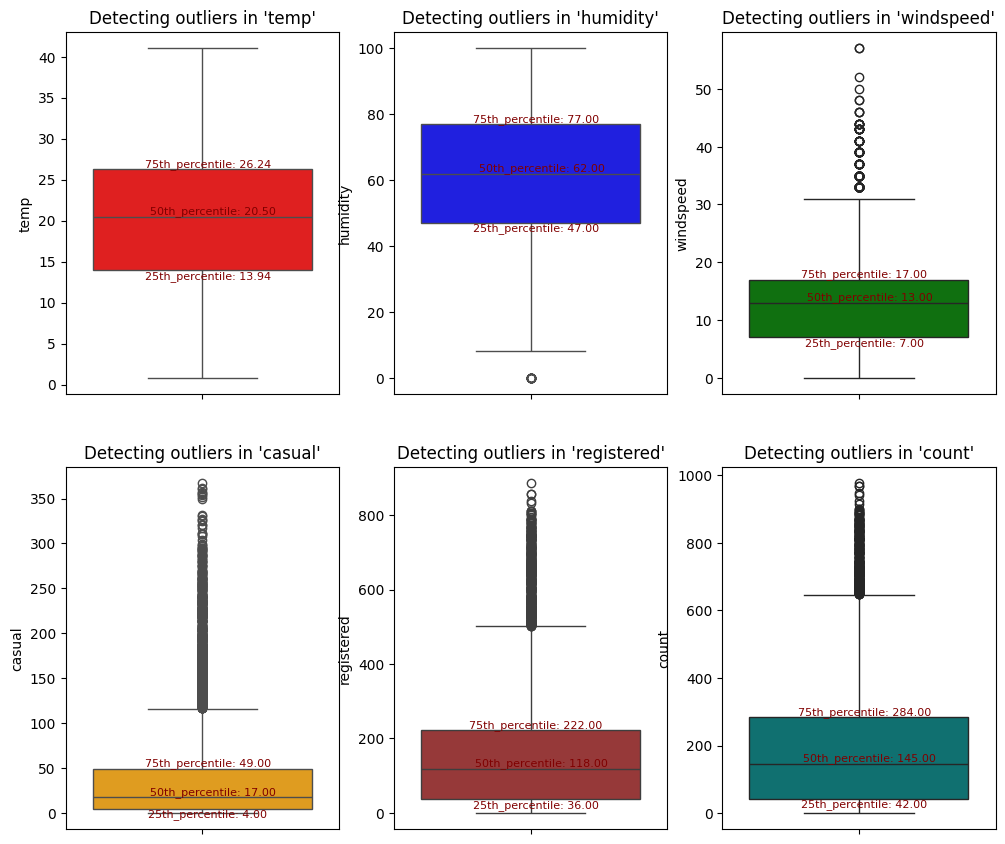

In [24]:
columns = ['temp', 'humidity', 'windspeed', 'casual', 'registered', 'count']
colors = ['red', 'blue', 'green', 'orange', 'brown', 'teal']
count = 1
plt.figure(figsize=(12, 16))
for i in columns:
    plt.subplot(3, 3, count)
    plot = sns.boxplot(data=df, y=i, color=colors[count-1])
    plt.title(f"Detecting outliers in '{i}'")
    
# Calculate and annotate percentiles
    percentiles = df[i].describe(percentiles=[.25, .5, .75,0.90])
    p25 = percentiles['25%']
    p50 = percentiles['50%']
    p75 = percentiles['75%']
# Annotate the percentiles on the plot
    plt.text(y=p25, x=0.02, s=f'25th_percentile: {p25:.2f}', color='Maroon', ha='center', va='top', fontsize=8)
    plt.text(y=p50, x=0.04, s=f'50th_percentile: {p50:.2f}', color='Maroon', ha='center', va='bottom', fontsize=8)
    plt.text(y=p75, x=0.02, s=f'75th_percentile: {p75:.2f}', color='Maroon', ha='center', va='bottom', fontsize=8)
    count = count + 1

## C. Bivariate analysis

##### Distribution of demand of rental bikes for different variables such as season, workday, holiday and weather

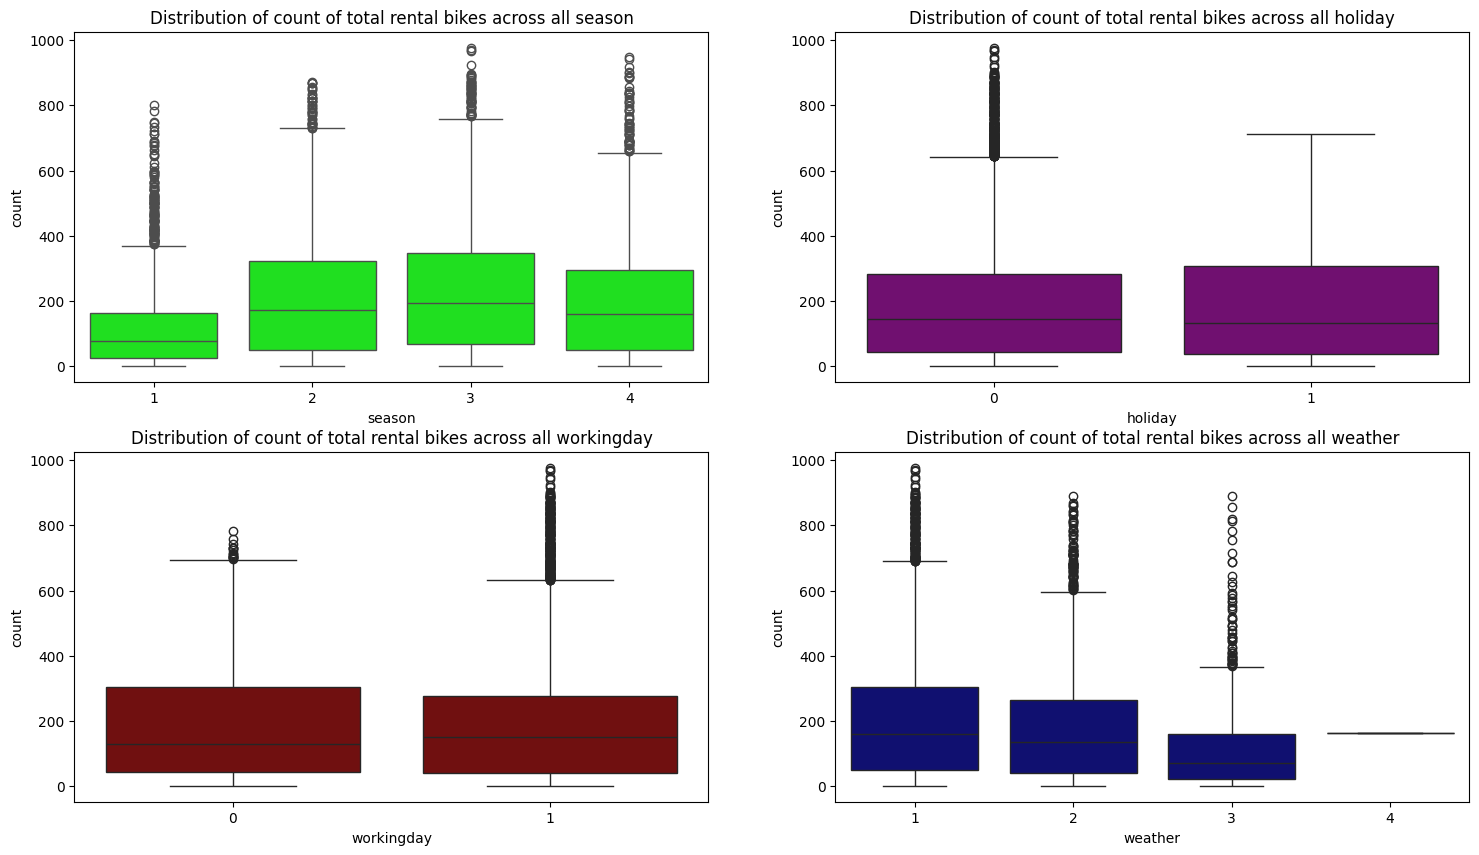

In [25]:
columns=['season','holiday','workingday','weather']
colors = ['lime', 'purple', 'maroon', 'navy']
plt.figure(figsize=(18,10))
count=1
for data in columns:
    plt.subplot(2,2,count)
    plt.title(f'Distribution of count of total rental bikes across all {data}')
    sns.boxplot(data=df, x=data, y='count',color=colors[count-1])
    count=count+1
plt.show()

#### Insights: 

1. **Seasonal Impact on Demand:**
    * Summer, fall, and winter exhibit similar median demand.
    * Spring experiences notably lower median demand.
    * Outliers are prevalent across all seasons, with spring showing a higher concentration, particularly in the upper range of the Inter Quartile Range (IQR).
2. **Holiday vs. Non-Holiday Demand:**
    * Median demand remains consistent during both holidays and non-holidays.
    * Outliers are noticeable in non-holiday demand, especially in the upper IQR.
3. **Working Day vs. Non-Working Day Impact:**
    * There is a slight median difference between working and non-working days.
    * Outliers are present in vehicle demand for both working and non-working days.
4. **Weather Conditions and Demand:**
    * Clear/few clouds and misty/cloudy conditions show similar median demand.
    * Demand decreases during light snow/light rain compared to clear and misty conditions.
    * Limited data exists for heavy rain and thunderstorms, resulting in only one data point.


### D. Correlation (Heatmap)

* Checking the correlation between the paramters such as 'temp','atemp', 'humidity','windspeed','casual','registered',count

In [26]:
df_1=df.copy()
df_1.drop(['season_category','datetime','season','holiday','workingday','weather'],axis=1, inplace=True)

<Axes: >

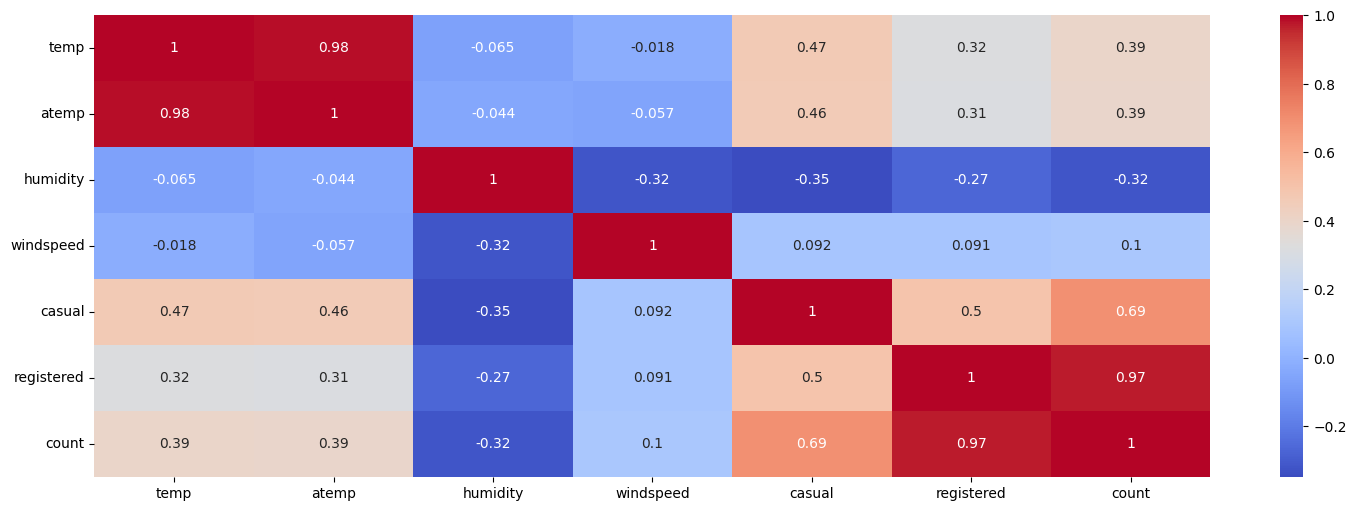

In [27]:
plt.figure(figsize=(18,6))
sns.heatmap(df_1.corr(),annot=True, cmap='coolwarm')

## Insights:
1. Temperature related correlations:
   * Very high correlation (>0.9) between 'temp' and 'atemp', indicating a strong linear positive relationship.
   * Moderately positive correlation (0.45-0.50) between 'tempeerature' and casaul users. This suggests that casual users might be more inclined to rent bikes when the temperature is higher.
   * Low positive correlation (0.30-0.32) between temperature and registered users immplies that while temperature might have some influence on the rental behavior of registered users, it is not as strong as the influence it has on casual users.

2. Humidity related correlations:

   * There is -ve weak correlation (0.25-0.35) between humidity  and windspeed, and count of casual and regsitered users. This implies that as humidity increases, the count of casual & registered users renting bikes tends to decrease slightly. It suggests that higher humidity levels might deter users from opting for bike rentals.

3. Windspeed related correlations.
   * There is very weak +ve correlation (0.10) between windspeed and number of casual and registered users.This implies that as windspeed increases, there is a very slight tendency for the count of casual & registered users renting bikes to increase marginally. However, the correlation is very weak, suggesting that windspeed has minimal influence on the rental behavior of users.

## Part-B Hypothesis Test

In [28]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   datetime         10886 non-null  datetime64[ns]
 1   season           10886 non-null  category      
 2   holiday          10886 non-null  category      
 3   workingday       10886 non-null  category      
 4   weather          10886 non-null  category      
 5   temp             10886 non-null  float64       
 6   atemp            10886 non-null  float64       
 7   humidity         10886 non-null  int64         
 8   windspeed        10886 non-null  float64       
 9   casual           10886 non-null  int16         
 10  registered       10886 non-null  int16         
 11  count            10886 non-null  int16         
 12  season_category  10886 non-null  category      
dtypes: category(5), datetime64[ns](1), float64(3), int16(3), int64(1)
memory usage: 543.1 KB


#### 1. Sample t-Test to check if workingday as an effect on the number of bikes rented.

* **Null Hypothesis (Ho)**: working days does not have any effect on number of bikes rented.
* **Alternate Hypothesis (Ha)**: working days has some effect on number of bikes rented.

**Rules for Accepting/Rejecting Hypothesis**
    Consider significance level (alpha) of 5%.
    * if p_value<=0.05. Reject null hypothesis in favour of alternate hypothesis.
    * if p_value>=0.05. Accept null hypothesis i.e. failed to reject null hypothesis.

**Condition of Independent Sample t-test:**
1. Independence:
   - The observations in each group must be independent of each other.
2. Normality:
   - The data in each group should be approximately normally distributed. If samplesize n>30, t-test is considered robust to violations of normality due to Central Limit Theorem.
3. Homogeneity of Variance:
   - The variance of the two groups being compared should be approximately equal.

**Perform Levene test for checking homegeneity of variance**

* **Null Hypothesis (Ho)**: Variance of two groups are same.
* **Alternate Hypothesis (Ha)**: Variance of two groups are different 

In [29]:
#working day sample
sample_1= df.loc[df['workingday']==1,'count']
#Non-working day sample
sample_2= df.loc[df['workingday']==0,'count']

In [30]:
levene(sample_1,sample_2)

LeveneResult(statistic=0.004972848886504472, pvalue=0.9437823280916695)

* Since p_value is greater than 0.05. Failed to reject the null hypothesis. i.e. variance of two groups are same.
* Hence t-test can be performed

**Perform t-test**

* **Null Hypothesis (Ho)**: working days does not have any effect on number of bikes rented.
* **Alternate Hypothesis (Ha)**: working days has some effect on number of bikes rented.

In [31]:
ttest_ind(sample_1,sample_2)

TtestResult(statistic=1.2096277376026694, pvalue=0.22644804226361348, df=10884.0)

* Since p_value is greater than 0.05. Failed to reject the null hypothesis.
* There is not sufficient evidence to conclude that working day does not have any effect on number of bikes rented

## 2A. Perform ANOVA test 
#### ** To check if number of bikes rented is similar or different in various seasons

**Null Hypothesis (Ho)**: Number of bikes rented is similar in different seasons.

**Alternate Hypothesis (Ha)**: Number of bikes rented is not similar in different season.

**Significance level=0.05**

**Rules for Accepting/Rejecting Hypothesis**
    Consider significance level (alpha) of 5%.
    
    * if p_value<=0.05. Reject null hypothesis in favour of alternate hypothesis.
    * if p_value>=0.05. Accept null hypothesis i.e. failed to reject null hypothesis.

**Condition of Independent Sample t-test:**
1. Independence:
   - The observations in each group must be independent of each other.
2. Normality:
   - The data in each group should be approximately normally distributed. If samplesize n>30, t-test is considered robust to violations of normality due to Central Limit Theorem.
3. Homogeneity of Variance:
   - The variance of the two groups being compared should be approximately equal.

In [32]:
season_1=df[df['season_category']=='spring'][['count']]
season_2=df[df['season_category']=='summer'][['count']]
season_3=df[df['season_category']=='rainy'][['count']]
season_4=df[df['season_category']=='winter'][['count']]

#### Step_1 Check for Normal distribution

**Method-1** **Histogram Visualization**

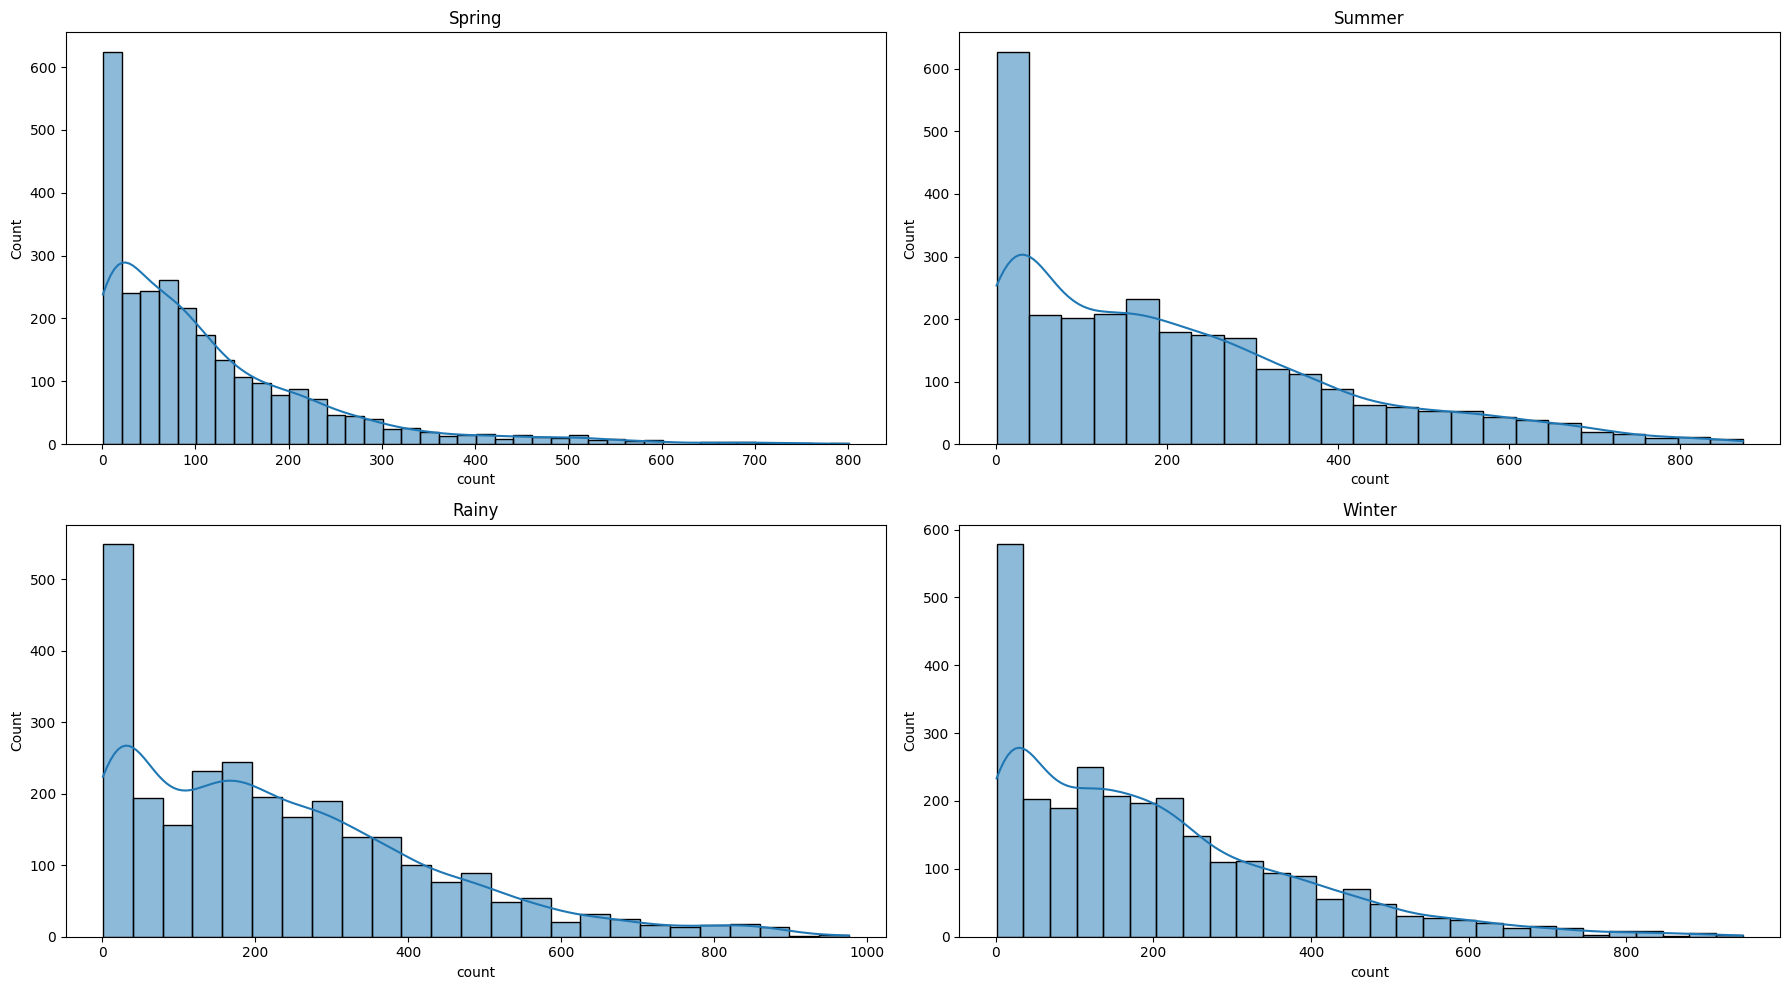

In [33]:
seasons = [season_1, season_2, season_3, season_4]
titles = ['Spring', 'Summer', 'Rainy', 'Winter']

plt.figure(figsize=(18, 10))

for i in range(len(seasons)):
    plt.subplot(2, 2, i + 1)
    sns.histplot(data=seasons[i], x='count', kde=True)
    plt.title(titles[i])
plt.tight_layout()
plt.show()

* Histogram for different seasons shows that there is no normal distribution.
* Check for normality by other method

**Method-2** **QQ Plot Visualization**

In [34]:
from statsmodels.graphics.gofplots import qqplot
import scipy.stats as stats

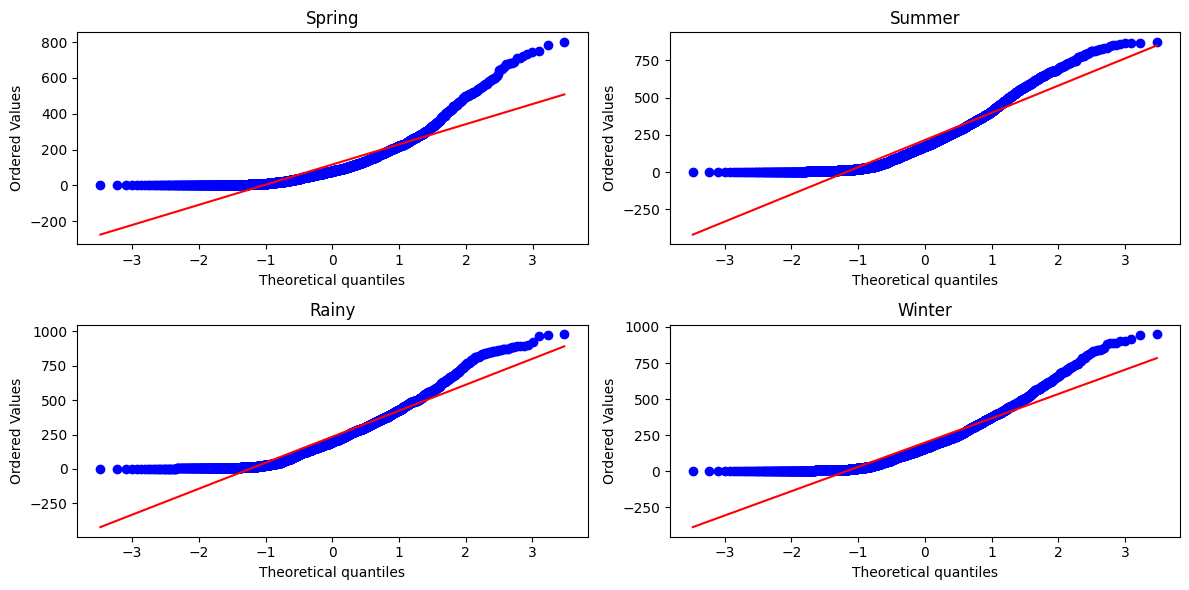

In [35]:
df_season_1=df[df['season_category']=='spring']['count']
df_season_2=df[df['season_category']=='summer']['count']
df_season_3=df[df['season_category']=='rainy']['count']
df_season_4=df[df['season_category']=='winter']['count']
seasons = [df_season_1, df_season_2, df_season_3, df_season_4]
titles = ['Spring', 'Summer', 'Rainy', 'Winter']

plt.figure(figsize=(12,6))

for i in range(len(seasons)):
    plt.subplot(2, 2, i + 1)
    stats.probplot(seasons[i], dist='norm', plot=plt)
    plt.title(titles[i])
plt.tight_layout()
plt.show()

* Considering the QQ-Plots, it can be said that dataset does not follows normal distribution
* Lets try other method

**Method-3** **William Shapiro Test**
* **Null Hypothesis (Ho)**: Season doesnot follow normal distribution.
* **Alternate Hypothesis (Ha)**: Season follows normal distribution.

**Rules for Accepting/Rejecting Hypothesis**
    Consider significance level (alpha) of 5%.
    
    * if p_value<=0.05. Reject null hypothesis in favour of alternate hypothesis.
    * if p_value>=0.05. Accept null hypothesis i.e. failed to reject null hypothesis.

In [36]:
shapiro(df_season_1)

ShapiroResult(statistic=0.8087378401253588, pvalue=8.749584618867662e-49)

 * Conclusion: As p_value is almost 0.i.e. Null Hypothesis is rejected 
 * Summer season does not follows normal distribution 

In [37]:
shapiro(df_season_2)

ShapiroResult(statistic=0.9004818080893252, pvalue=6.039374406270491e-39)

 * Conclusion: As p_value is almost 0.i.e. Null Hypothesis is rejected 
 * Spring season does not follows normal distribution 

In [38]:
shapiro(df_season_3)

ShapiroResult(statistic=0.9148166372899196, pvalue=1.043680518918597e-36)

 * Conclusion: As p_value is almost 0.i.e. Null Hypothesis is rejected 
 * Rainy season does not follows normal distribution 

In [39]:
shapiro(df_season_4)

ShapiroResult(statistic=0.8954637482095505, pvalue=1.1299244409282836e-39)

 * Conclusion: As p_value is almost 0.i.e. Null Hypothesis is rejected 
 * Winter season does not follows normal distribution 

### Step_2: Perform Levene Test
**Checking homogeneity of variance**

**Perform Levene test for checking homegeneity of variance**

* **Null Hypothesis (Ho)**: Variance of two groups are same.
* **Alternate Hypothesis (Ha)**: Variance of groups are different 

In [40]:
levene(df_season_1,df_season_2,df_season_3,df_season_4)

LeveneResult(statistic=187.7706624026276, pvalue=1.0147116860043298e-118)

* Since p_value is almost zero i.e. reject the null hypothesis.
* Variance of two groups are not equal

**Conlusion**

* **Since QQ Test, William Shapiro Test, Levene Test has been failed.**

* **Conditions of ANOVA Test are not satisfied.**

* **If ANOVA Test fails, alternatively perform Kruskal Wallis Test**

#### Perform Kruskal Wallis Test

**Null Hypothesis (Ho)**: Number of bikes rented is similar in different seasons.

**Alternate Hypothesis (Ha)**: Number of bikes rented is not similar in different season.

In [41]:
kruskal(df_season_1,df_season_2,df_season_3,df_season_4)

KruskalResult(statistic=699.6668548181988, pvalue=2.479008372608633e-151)

**Conclusion**
 * Since p_value is almost zero. we reject the null hypothesis.
 * This suggests that number of bikes is not similar or varieas across different season conditions like rainly, winter etc.

## 2B. Perform ANOVA test 
#### ** To check if number of bikes rented is similar or different in various weathers
**Null Hypothesis (Ho)**: Number of bikes rented is similar in different weather

**Alternate Hypothesis (Ha)**: Number of bikes rented is not similar in different weather.

**Significance level=0.05**
**Rules for Accepting/Rejecting Hypothesis**
    Consider significance level (alpha) of 5%.
    
    * if p_value<=0.05. Reject null hypothesis in favour of alternate hypothesis.
    * if p_value>=0.05. Accept null hypothesis i.e. failed to reject null hypothesis.

**Condition of Independent Sample t-test:**
1. Independence:
   - The observations in each group must be independent of each other.
2. Normality:
   - The data in each group should be approximately normally distributed. If samplesize n>30, t-test is considered robust to violations of normality due to Central Limit Theorem.
3. Homogeneity of Variance:
   - The variance of the two groups being compared should be approximately equal.

In [42]:
weather_1=df[df['weather']==1][['count']]
weather_2=df[df['weather']==2][['count']]
weather_3=df[df['weather']==3][['count']]
weather_4=df[df['weather']==4][['count']]

#### Step_1 Check for Normal distribution

**Method-1** **Histogram Visualization**

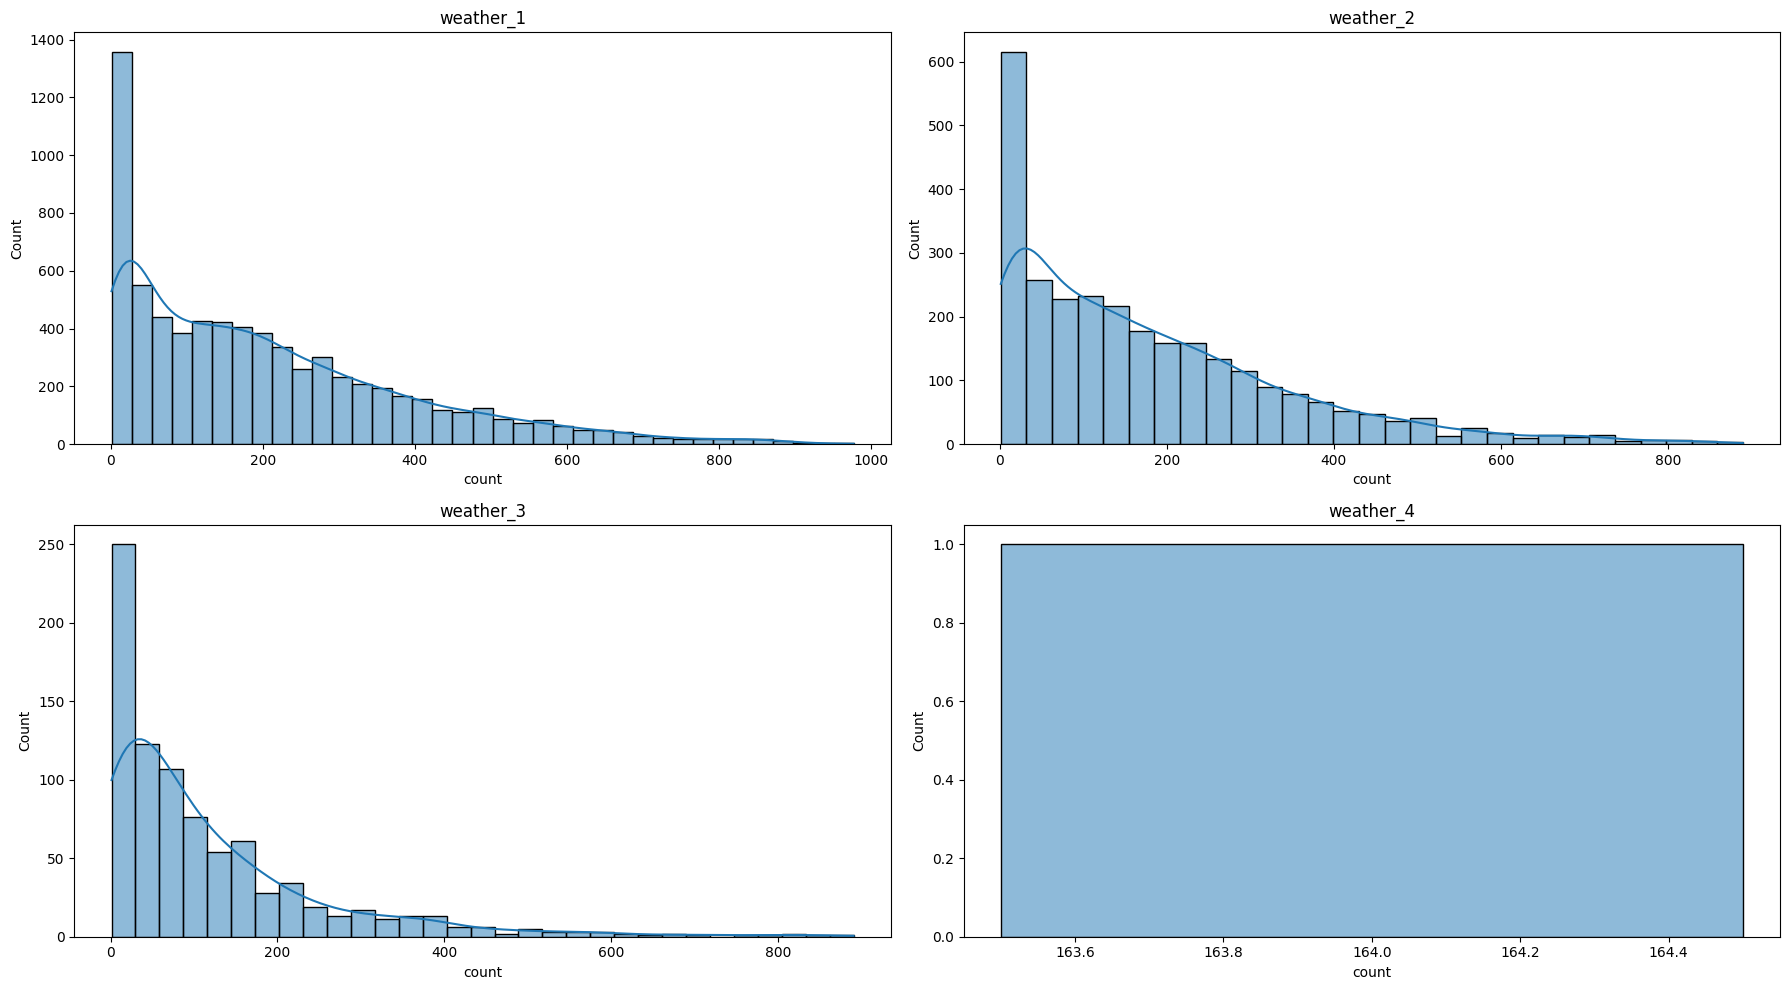

In [43]:
weathers = [weather_1, weather_2, weather_3, weather_4]
titles = ['weather_1','weather_2','weather_3','weather_4']

plt.figure(figsize=(18, 10))

for i in range(len(weathers)):
    plt.subplot(2, 2, i + 1)
    sns.histplot(data=weathers[i], x='count', kde=True)
    plt.title(titles[i])
plt.tight_layout()
plt.show()

* Histogram for different weathers shows that there is no normal distribution.
* Check for normality by other method

**Method-2** **QQ Plot Visualization**

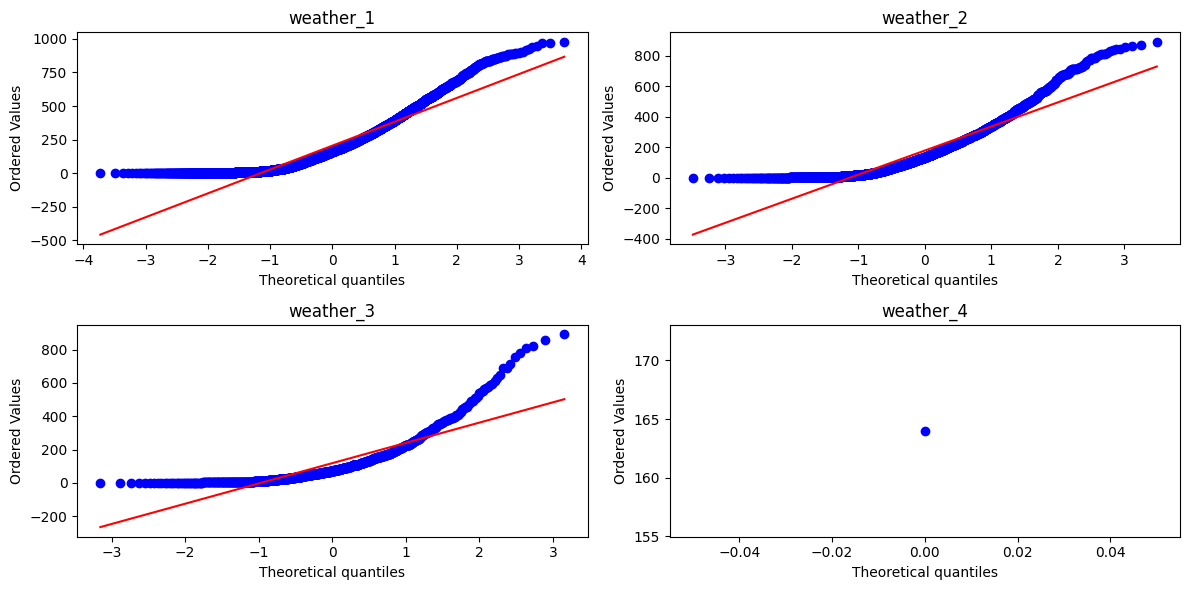

In [44]:
df_weather_1=df[df['weather']==1]['count']
df_weather_2=df[df['weather']==2]['count']
df_weather_3=df[df['weather']==3]['count']
df_weather_4=df[df['weather']==4]['count']
weathers = [df_weather_1,df_weather_2,df_weather_3,df_weather_4]
titles = ['weather_1','weather_2','weather_3','weather_4']

plt.figure(figsize=(12,6))

for i in range(len(weathers)):
    plt.subplot(2, 2, i + 1)
    stats.probplot(weathers[i], dist='norm', plot=plt)
    plt.title(titles[i])
plt.tight_layout()
plt.show()

* Considering the QQ-Plots, it can be said that dataset does not follows normal distribution
* Lets try other method

**Method-3** **William Shapiro Test**
* **Null Hypothesis (Ho)**: weathers doesnot follow normal distribution.
* **Alternate Hypothesis (Ha)**: weathers follows normal distribution.

**Rules for Accepting/Rejecting Hypothesis**
    Consider significance level (alpha) of 5%.
    
    * if p_value<=0.05. Reject null hypothesis in favour of alternate hypothesis.
    * if p_value>=0.05. Accept null hypothesis i.e. failed to reject null hypothesis.

In [45]:
shapiro(df_weather_1)

ShapiroResult(statistic=0.8909259459740138, pvalue=1.5964921477006552e-57)

 * Conclusion: As p_value is almost 0.i.e. Null Hypothesis is rejected 
 * Weather_1 season does not follows normal distribution 

In [46]:
shapiro(df_weather_2)

ShapiroResult(statistic=0.8767694973495206, pvalue=9.777839106111785e-43)

 * Conclusion: As p_value is almost 0.i.e. Null Hypothesis is rejected 
 * Weather_2 season does not follows normal distribution 

In [47]:
shapiro(df_weather_3)

ShapiroResult(statistic=0.7674327906035717, pvalue=3.875893017396149e-33)

 * Conclusion: As p_value is almost 0.i.e. Null Hypothesis is rejected 
 * Weather_3 season does not follows normal distribution

 * For Weather_4 Shapiro test is not applicable as dataset has just a single data. Hence can not perform test.

### Step_2: Perform Levene Test
**Checking homogeneity of variance**

**Perform Levene test for checking homegeneity of variance**

* **Null Hypothesis (Ho)**: Variance of two groups are same.
* **Alternate Hypothesis (Ha)**: Variance of groups are different 

In [48]:
levene(df_weather_1,df_weather_2,df_weather_3,df_weather_4)

LeveneResult(statistic=54.85106195954556, pvalue=3.504937946833238e-35)

* Since p_value is almost zero i.e. reject the null hypothesis.
* Variance of differnet seasons are not equal

**Conlusion**

* **Since QQ Test, William Shapiro Test, Levene Test has been failed.**

* **Conditions of ANOVA Test are not satisfied.**

* **If ANOVA Test fails, alternatively perform Kruskal Wallis Test**

#### Perform Kruskal Wallis Test

**Null Hypothesis (Ho)**: Number of bikes rented is similar in different weathers.

**Alternate Hypothesis (Ha)**: Number of bikes rented is not similar in different weathers.

In [49]:
kruskal(df_weather_1,df_weather_2,df_weather_3,df_weather_4)

KruskalResult(statistic=205.00216514479087, pvalue=3.501611300708679e-44)

**Conclusion**
 * Since p_value is almost zero. we reject the null hypothesis.
 * This suggests that number of bikes is not similar or varies across different weather conditions

## 3. Chi-Square Test

#### **To Check whether **weather** is dependent on **season**

In [50]:
df[['weather','season']].describe()

,weather,season
count,10886,10886
unique,4,4
top,1,4
freq,7192,2734


* **Null Hypothesis (Ho)**: Weather is independent of seasons.
* **Alternate Hypothesis (Ha)**: Weather is dependent on seasons.

* **Rules for Accepting/Rejecting Hypothesis**
    * Consider significance level (alpha) of 5%.

 
      *Based on p_value*
      
    * if p_value<=0.05. Reject null hypothesis in favour of alternate hypothesis.
    * if p_value>=0.05. Accept null hypothesis i.e. failed to reject null hypothesis.

**Formulation of contingency table**

In [51]:
cross_table=pd.crosstab(df['season_category'],df['weather'])
cross_table

weather,1,2,3,4
season_category,,,,
spring,1759,715,211,1
summer,1801,708,224,0
rainy,1930,604,199,0
winter,1702,807,225,0


In [52]:
chi_value, p_value, dof, expected_values=chi2_contingency(cross_table)

In [53]:
print('chi-value:',chi_value.round(2),'degree of freedom:', dof)

chi-value: 49.16 degree of freedom: 9


In [54]:
expected_values=np.round(expected_values).astype(int)
expected_values

array([[1775,  699,  212,    0],
       [1806,  711,  216,    0],
       [1806,  711,  216,    0],
       [1806,  712,  216,    0]])

In [55]:
p_value

1.549925073686492e-07

* Since p_value is alomost zero i.e. <0.05. Hence reject null hypothesis.

**Conclusion**

    *Weather is dependent on season.

## Business Insights: 

**1. Casual vs. Registered Users:**
    
    * 81.2% of users are registered, while 18.8% are casual users.

**2. Demand Growth:**
    
    * The average hourly count of rental bikes increased significantly from 2011 to 2012, rising by 65.14%. This indicates a growing demand for electric vehicles.

**3. Seasonal Demand:**
    
    * Demand is similar during the summer, rainy, and winter seasons.
    * Spring shows a slightly lower demand compared to other seasons.

**4. Holiday Impact:**
    
    * Non-holidays dominate the calendar with 10,575 days, while holidays are rare with 311 days.
    * Median bike rental demand is consistent on both holidays and non-holidays.
**5. Working Day Impact:**

    * Bike rentals are more common on working days (7,412) than on weekends (3,674).
    * This suggests that bikes are frequently used for daily commuting.

**6. Weather Conditions:**

    * Most bike rentals occur during clear weather (type 1), followed by cloudy conditions (type 2), with the fewest rentals happening during light rain (type 3).
    * This shows that weather conditions significantly affect bike rental services.

**7. Temperature Influence:**

    * Bike rentals are highest when temperatures range between 13°C and 28°C.
    * Very low or high temperatures result in fewer bike rentals.

**8. Windspeed Influence:**

    * Higher wind speeds are associated with a decrease in bike rentals.
    * The peak demand for rental bikes (85%) is observed when wind speeds are between 8 and 20 km/h.

**9. Humidity Influence:**

    * Increased humidity levels (between 40% and 90%) are linked to higher bike rentals.

**10. Monthly Trends:**
    
    * The average hourly count of rental bikes is lowest in January, followed by February and March.

**11. Hourly Fluctuation:**
    
    * Bike rentals follow a clear daily pattern: low counts in the early morning, a sharp rise in the morning, a peak in the afternoon, and a gradual decline in the evening and night. This pattern reflects typical commuting hours and leisure usage.

## Recommendations

**1. Enhance User Registration Incentives:**

Given that 81.2% of users are registered, consider offering additional incentives for casual users to register. This could include discounts, loyalty programs, or exclusive access to premium services.

**2. Expand Fleet to Meet Growing Demand:**

The significant growth in the mean hourly count of rental bikes from 2011 to 2012 suggests a rising demand for electric vehicles. Increase the number of available bikes and consider expanding the service area to accommodate this growing interest.

**3.Target Seasonal Campaigns:**

Since demand is slightly lower in the spring, launch targeted marketing campaigns during this season to boost rentals. Promotions, special offers, or events could help stimulate demand.

**4.Optimize Fleet Availability for Daily Patterns:**

Align bike availability with the clear daily rental patterns observed. Ensure a higher number of bikes are available during morning and afternoon peaks to cater to commuting and leisure users. Consider flexible docking solutions to accommodate varying demand throughout the day.

**5. Adjust Inventory Based on Temperature Trends:**

Since bike rentals peak when temperatures are between 13°C and 28°C, ensure a higher number of bikes are available during these optimal temperature ranges. Conversely, reduce the fleet size or offer alternative services during extreme temperature periods.

--------------------------------------------------END-----------------------------------------